# **Visão Computacional:** Leitura de imagens BMPs com Python

*   Boa parte deste código foi implementada pelo aluno Guilherme Bueno Martins

Este _notebook_ tem o objetivo de demonstrar alguns conceitos básicos sobre armazenamento/leitura de imagens BMP utilizando a linguagem de programação Python. Desta forma, ao longo deste _notebook_, estão disponíveis explicações a respeito do comportamento de funções, blocos de código e instruções.



## **Preparando o ambiente**

Antes de iniciar executando qualquer um dos blocos de código abaixo, é necessário conectar o Google Drive e preparar o ambiente onde serão manipuladas as imagens exemplos.

In [ ]:
#Conectar e montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
#Mapear o caminho da pasta onde estão os meus dados (cada usuário deve indicar o caminho)
PATH = '/content/drive/MyDrive/Especialização/VC2025/Leitura_BMP/'

In [3]:
#importação das bibliotecas (obs: nenhuma biblioteca de processamento de imagens é utilizada)
import numpy as np
import struct
from matplotlib import pyplot as plot

## **Classes de leitura**

Um arquivo de imagem BMP pode ser divido em quatro partes:
 + Cabeçalho do arquivo;
 + Cabeçalho mapa de bits / DIB (_Device independent bitmaps_);
 + Paleta de cores (apenas para imagens de 1, 4 ou 8 bits/pixel); e
 + Dados da imagens.

As classes definidas abaixo representam, respectivamente: o _cabeçalho do arquivo_; o _cabeçalho mapa de bits_; e a _paleta de cores_.

|Linha | Nome | Classe | Campo | Tamanho |
|------|---------|------|--------|--------|
| 0 | Cabeçalho do arquivo | `Cab1` | Tipo/Assinatura | 2 bytes |
| 1 | Cabeçalho do arquivo | `Cab1` | Tamanho da imagem | 4 bytes |
| 2 | Cabeçalho do arquivo | `Cab1` | Reservado 1 | 2 bytes |
| 3 | Cabeçalho do arquivo | `Cab1` | Reservado 2 | 2 bytes |
| 4 | Cabeçalho do arquivo | `Cab1` | Início dos dados da imagem | 4 bytes |
|------|---------|------|--------|--------|
| 5 | Cabeçalho mapa de bits | `Cab2` | Tamanho do cabeçalho da imagem | 4 bytes |
| 6 | Cabeçalho mapa de bits | `Cab2` | Altura | 4 bytes |
| 7 | Cabeçalho mapa de bits | `Cab2` | Largura | 4 bytes |
| 8 | Cabeçalho mapa de bits | `Cab2` | Planos | 2 bytes |
| 9 | Cabeçalho mapa de bits | `Cab2` | Bits por ponto | 2 bytes |
| 10 | Cabeçalho mapa de bits | `Cab2` | Tipo de compressão | 4 bytes |
| 11 | Cabeçalho mapa de bits | `Cab2` | Tamanho da imagem comprimida | 4 bytes |
| 12 | Cabeçalho mapa de bits | `Cab2` | Resolução horizontal | 4 bytes |
| 13 | Cabeçalho mapa de bits | `Cab2` | Resolução vertical | 4 bytes |
| 14 | Cabeçalho mapa de bits |`Cab2` | Nº máximo de cores | 4 bytes |
| 15 | Cabeçalho mapa de bits | `Cab2` | Nº cores usadas | 4 bytes |
|------|---------|------|--------|--------|
| 16 | Paleta de cores | `Cab3` | Blue | 1 byte |
| 17 | Paleta de cores | `Cab3` | Green | 1 byte |
| 18 | Paleta de cores | `Cab3` | Red | 1 byte |
| 19 | Paleta de cores | `Cab3` | Reservado | 1 byte |



In [4]:
#cabeçalho do arquivo
class Cab1():
  def __init__(self, bmp):
    self.tipo = bmp.read(2).decode()
    self.tamanho_imagem = struct.unpack('I', bmp.read(4))[0]
    self.reservado_1 = struct.unpack('H', bmp.read(2))[0]
    self.reservado_2 = struct.unpack('H', bmp.read(2))[0]
    self.inicio_dados_imagem = struct.unpack('I', bmp.read(4))[0]

#cabeçalho do mapa de bits
class Cab2():
  def __init__(self, bmp):
    self.tamanho_do_cabecalho_da_imagem = struct.unpack('I', bmp.read(4))[0]
    self.largura = struct.unpack('I', bmp.read(4))[0]
    self.altura = struct.unpack('I', bmp.read(4))[0]
    self.planos = struct.unpack('H', bmp.read(2))[0]
    self.bits_por_ponto = struct.unpack('H', bmp.read(2))[0]
    self.tipo_de_compressao = struct.unpack('I', bmp.read(4))[0]
    self.tamanho_da_imagem_comprimida = struct.unpack('I', bmp.read(4))[0]
    self.resolucao_horizontal = struct.unpack('I', bmp.read(4))[0]
    self.resolucao_vertical = struct.unpack('I', bmp.read(4))[0]
    self.numero_maximo_de_cores = struct.unpack('I', bmp.read(4))[0]
    self.numero_de_cores_usadas = struct.unpack('I', bmp.read(4))[0]

#paleta de cores
class Cab3():
  def __init__(self, bmp):
    self.blue = struct.unpack('B', bmp.read(1))[0]
    self.green = struct.unpack('B', bmp.read(1))[0]
    self.red = struct.unpack('B', bmp.read(1))[0]
    self.reserv = struct.unpack('B', bmp.read(1))[0]


## **Funções e manipulação de arquivo**

Para uma melhor organização e entendimento do código, foi criados métodos que atendem-se ao propósito de fazer interface na obtenção da imagem exemplo e verificação desta como um preventivo tratamento de erro. Assim, compreende:

 + `get_nome_arq()`: solicita ao usuário o nome de imagem BMP com a extensão;
 + `abrir_imagem(nome_arq)`: abre imagem usando o nome do arquivo a partir da pasta referência (PATH);
 + `e_bmp(imagem)`: verifica se imagem encontrada é do tipo BMP pela assinatura "BM" ou _"DB"_;
 + `selecionar_imagem()`: combina as funções acima solicitando, se necessário, um arquivo de imagem válido.

In [5]:
def get_nome_arq():
  return input('Insira o nome da imagem BMP: ')

def abrir_imagem(nome_arq):
  return open(PATH + '/' + nome_arq, 'rb')

def e_bmp(imagem):
  return imagem.read(2) == b'BM'

def selecionar_imagem():
  nome_arq = get_nome_arq()
  imagem = abrir_imagem(nome_arq)
  while not e_bmp(imagem):
    print(nome_arq, 'não é uma imagem BMP.')
    nome_arq = get_nome_arq()
    imagem = abrir_imagem(nome_arq)
  print('Assinatura da imagem verificada.')
  return abrir_imagem(nome_arq)


Nesta célula ocorre a execução das funções e instanciações das classes já declaradas. Porém, a leitura da imagem é feita em _buffering_ (em memória), o que restringe a ordem de leitura dos dados depois de extraídos. A inversão da instanciação das classes implicará em erro, pois acarretará na inversão de uma das partes da leitura da imagem.

In [6]:
#imagem = selecionar_imagem()
nome_arq = 'lenna_16cores.bmp'
imagem = abrir_imagem(nome_arq)
cab_arq = Cab1(imagem)
cab_mapa_bits = Cab2(imagem)

Para visualizar os dados da imagem (cabeçalhos) basta dar _play_ na célula abaixo.

In [7]:
print('Tipo/Assinatura\t:{}'.format(cab_arq.tipo))
print('Tamanho arquivo\t: {}'.format(cab_arq.tamanho_imagem))
print('Reservado 1\t: {}'.format(cab_arq.reservado_1))
print('Reservado 2\t: {}'.format(cab_arq.reservado_2))
print('Início Dados\t: {}'.format(cab_arq.inicio_dados_imagem))

print('\nCabeçalho de mapa de bits')
print('Tamanho cabeçalho\t: {}'.format(cab_mapa_bits.tamanho_do_cabecalho_da_imagem))
print('Largura da Imagem\t: {}'.format(cab_mapa_bits.largura))
print('Altura da Imagem\t: {}'.format(cab_mapa_bits.altura))
print('Nº de Planos\t\t: {}'.format(cab_mapa_bits.planos))
print('Bits por Pixel\t\t: {}'.format(cab_mapa_bits.bits_por_ponto))
print('Compressão Usada\t: {}'.format(cab_mapa_bits.tipo_de_compressao))
print('Tamanho Img(dados)\t: {}'.format(cab_mapa_bits.tamanho_da_imagem_comprimida))
print('Resolução Horiz.\t: {}'.format(cab_mapa_bits.resolucao_horizontal))
print('Resolução Vertical\t: {}'.format(cab_mapa_bits.resolucao_vertical))
print('Nº Cores Usadas\t\t: {}'.format(cab_mapa_bits.numero_maximo_de_cores))
print('Nº Cores Importantes\t: {}'.format(cab_mapa_bits.numero_maximo_de_cores))


Tipo/Assinatura	:BM
Tamanho arquivo	: 131190
Reservado 1	: 0
Reservado 2	: 0
Início Dados	: 118

Cabeçalho de mapa de bits
Tamanho cabeçalho	: 40
Largura da Imagem	: 512
Altura da Imagem	: 512
Nº de Planos		: 1
Bits por Pixel		: 4
Compressão Usada	: 0
Tamanho Img(dados)	: 131072
Resolução Horiz.	: 0
Resolução Vertical	: 0
Nº Cores Usadas		: 0
Nº Cores Importantes	: 0


## **Interpretando a paleta de cores**

Uma vez obtido os valores do _cabeçalho mapa de bits_, é feita a contagem de _bytes_ para a leitura da tabela de cores e exibição. Sabe-se que a paleta de cores RGB é dada por 4 colunas que são respectivamente as cores: vermelho (_Red_), verde (_Green_) e azul (_Blue_).

In [8]:
imagem.seek(54)
qtd_cores = int(pow(2, cab_mapa_bits.bits_por_ponto))
paleta = []
print('Paleta de Cores')
if qtd_cores <= 256:
  for i in range(qtd_cores):
    lin_paleta = Cab3(imagem)
    paleta.append([lin_paleta.blue, lin_paleta.green, lin_paleta.red, lin_paleta.reserv])
    print('Cor {0}: {1}\t {2}\t {3}\t {4}'.format(i, lin_paleta.blue, lin_paleta.green, lin_paleta.red, lin_paleta.reserv))
else:
  print('Não há paleta de cores!')


Paleta de Cores
Cor 0: 0	 0	 0	 0
Cor 1: 0	 0	 128	 0
Cor 2: 0	 128	 0	 0
Cor 3: 0	 128	 128	 0
Cor 4: 128	 0	 0	 0
Cor 5: 128	 0	 128	 0
Cor 6: 128	 128	 0	 0
Cor 7: 128	 128	 128	 0
Cor 8: 192	 192	 192	 0
Cor 9: 0	 0	 255	 0
Cor 10: 0	 255	 0	 0
Cor 11: 0	 255	 255	 0
Cor 12: 255	 0	 0	 0
Cor 13: 255	 0	 255	 0
Cor 14: 255	 255	 0	 0
Cor 15: 255	 255	 255	 0


## Visualizando a imagem

Feitas as importações e restando apenas os _bytes_ que compõe os dados da imagem é possível "montar" e visualizar a imagem executando o código da célula a seguir.

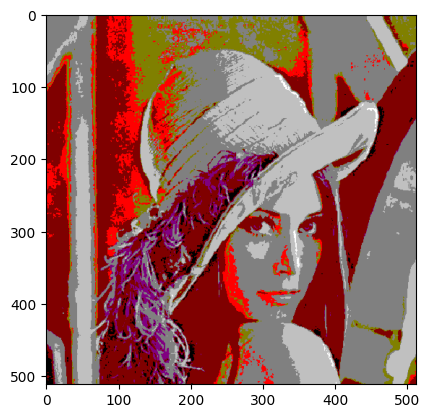

In [9]:
#Implementação Sidnei A. Araújo

#cria uma matriz preenchida com zeros - nela serão armazenados os valores RGB dos pixels
imagem.seek(cab_arq.inicio_dados_imagem)
num_lin = cab_mapa_bits.altura
num_col = cab_mapa_bits.largura
matriz_img = np.zeros((num_lin,num_col,3), dtype="uint8")

if cab_mapa_bits.bits_por_ponto == 24:
  #Caso seja uma imagem 24 bits/pixel
  for lin in range(num_lin-1,-1,-1):
    for col in range(num_col):
      B, G, R   = struct.unpack('BBB',imagem.read(3))
      matriz_img[lin,col]=[R,G,B]
  #Exibe a imagem
  plot.imshow(matriz_img)
elif cab_mapa_bits.bits_por_ponto == 8:
  #Caso seja uma imagem 8 bits/pixel
  for lin in range(num_lin-1,-1,-1):
    for col in range(num_col):
      cor = struct.unpack('B',imagem.read(1))[0]
      matriz_img[lin,col]=[paleta[cor][2],paleta[cor][1],paleta[cor][0]]
  #Exibe a imagem
  plot.imshow(matriz_img)
elif cab_mapa_bits.bits_por_ponto == 4:
  #Caso seja uma imagem 4 bits/pixel
  for lin in range(num_lin-1,-1,-1):
    for col in range(0,num_col,2):
      byte = struct.unpack('B',imagem.read(1))[0]
      #o byte é dividido em duas partes (|b1b2b3b4|b5b6b7b8|), e cada parte é a cor de 1 pixel
      cor1 = byte>>4 #|b1b2b3b4|
      cor2 = byte&15 #|b5b6b7b8|
      matriz_img[lin,col]  =[paleta[cor1][2],paleta[cor1][1],paleta[cor1][0]]
      matriz_img[lin,col+1]=[paleta[cor2][2],paleta[cor2][1],paleta[cor2][0]]
  #Exibe a imagem
  plot.imshow(matriz_img)
elif cab_mapa_bits.bits_por_ponto == 1:
  #Caso seja uma imagem 1 bit/pixel
  for lin in range(num_lin-1,-1,-1):
    for col in range(0,num_col,8):
      byte = struct.unpack('B',imagem.read(1))[0]
      #o Cada bit do byte (|b1|b2|b3|b4|b5|b6|b7|b8|) é a cor de um pixel
      cor1 = (byte>>7)%2 #|0000000b1|
      cor2 = (byte>>6)%2 #|000000b1b2|
      cor3 = (byte>>5)%2 #|00000b1b2b3|
      cor4 = (byte>>4)%2 #|0000b1b2b3b4|
      cor5 = (byte>>3)%2 #|000b1b2b3b4b5|
      cor6 = (byte>>2)%2 #|00b1b2b3b4b5b6|
      cor7 = (byte>>1)%2 #|0b1b2b3b4b5b6b7|
      cor8 = byte%2      #|b1b2b3b4b5b6b7b8|
      matriz_img[lin,col]  =[paleta[cor1][2],paleta[cor1][1],paleta[cor1][0]]
      matriz_img[lin,col+1]=[paleta[cor2][2],paleta[cor2][1],paleta[cor2][0]]
      matriz_img[lin,col+2]=[paleta[cor3][2],paleta[cor3][1],paleta[cor3][0]]
      matriz_img[lin,col+3]=[paleta[cor4][2],paleta[cor4][1],paleta[cor4][0]]
      matriz_img[lin,col+4]=[paleta[cor5][2],paleta[cor5][1],paleta[cor5][0]]
      matriz_img[lin,col+5]=[paleta[cor6][2],paleta[cor6][1],paleta[cor6][0]]
      matriz_img[lin,col+6]=[paleta[cor7][2],paleta[cor7][1],paleta[cor7][0]]
      matriz_img[lin,col+7]=[paleta[cor8][2],paleta[cor8][1],paleta[cor8][0]]
  #Exibe a imagem
  plot.imshow(matriz_img)
else:
  print('ERRO: O número de bits por pixel não é válido')

